In [1]:
import torch as tr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Neural Network classification with PyTorch

### Let's make some data

In [2]:
from sklearn.datasets import make_circles

# make 1000 samples 
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'first 5 samples of X:\n {X[:5]}')

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [5]:
print(f'first 5 samples of y:\n {y[:5]}')

first 5 samples of y:
 [1 1 1 1 0]


In [6]:
# make dataframe
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})

In [7]:
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


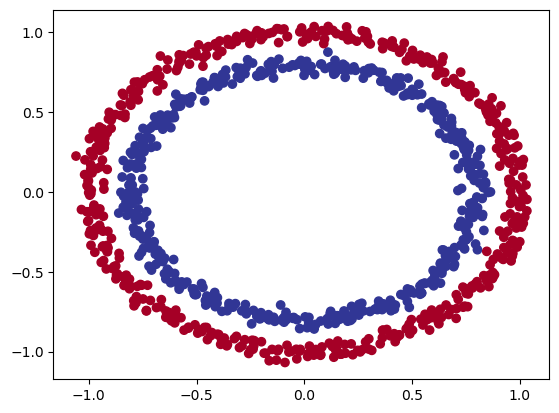

In [8]:
# let's visualize 
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

## Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
# View the first exapmle of featutes and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


## Turn data into tensors and create test and train split

In [12]:
# Tuen data into tensors
X = tr.from_numpy(X).type(tr.float)
y = tr.from_numpy(y).type(tr.float)

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

In [15]:
from torch import nn

In [16]:
class CirclemodelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #@ Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes 2 features and upscales them to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 layers from previus layer and outputs a single feature (same shape y)

        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2, out_features=5),
        #     nn.Linear(in_features=5, out_features=1))

    # Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

    # def forward_2(self, x):
    #     return two_linear_layers(x)
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CirclemodelV0()
model_0

CirclemodelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
## Let's replace the model above model using nn.Sequential()
model_0_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1))

model_0_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4353, -0.6914],
                      [-0.4306,  0.2853],
                      [-0.0605,  0.5162],
                      [ 0.3963, -0.2456],
                      [ 0.3528,  0.5013]])),
             ('layer_1.bias',
              tensor([-0.6728, -0.0642,  0.5653, -0.0221,  0.1883])),
             ('layer_2.weight',
              tensor([[ 0.1703, -0.0138,  0.1518, -0.1415,  0.2025]])),
             ('layer_2.bias', tensor([0.3534]))])

In [19]:
# Make predictions
with tr.inference_mode():
    untrained_preds = model_0(X_test)
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 labels: \n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.4534],
        [0.4549],
        [0.3811],
        [0.4742],
        [0.2726],
        [0.2744],
        [0.3647],
        [0.3221],
        [0.3857],
        [0.4538]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Cross Entropy loss

#### What's logit in Mahcine learninng?

## `torch.nn.BECWithLogitsLOSS()`

In [20]:
# Setup a loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = tr.optim.SGD(params=model_0.parameters(),
                         lr=0.1)

In [21]:
# Calculate accuracy - out of 100 examples, what % our model get right?
def accuracy_fn(y_true, y_pred):
    correct = tr.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Train model

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward (backpropagation)
5. Optimizer step (gradient descent)

### Going from raw logits->prediction probabilites->prediction labels

In [22]:
model_0

CirclemodelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
# View teh first 5 outputs of the forward pass on the test data
model_0.eval()
with tr.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[0.4534],
        [0.4549],
        [0.3811],
        [0.4742],
        [0.2726]])

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [25]:
# Use Sigmoid activation function on our model logits to turn them into prediction probabilites 
y_preds_probs = tr.sigmoid(y_logits)
y_preds_probs

tensor([[0.6114],
        [0.6118],
        [0.5941],
        [0.6164],
        [0.5677]])

In [26]:
tr.round(y_preds_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [27]:
y_preds = tr.round(y_preds_probs)

y_pred_labels = tr.round(tr.sigmoid(model_0(X_test)[:5]))

# Checking for equality 
print(tr.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

## Building a train/test loop

In [28]:
tr.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = tr.round(tr.sigmoid(y_logits))

    # Calculate loss/accuracy
    # loss = loss_fn(tr.sigmoid(y_logits), # for BCEloss
    #                y_train)
    loss = loss_fn(y_logits, 
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward (backpropagation)
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    # testing
    model_0.eval()
    with tr.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = tr.round(tr.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.71001, Accuracy: 50.00% | Test Loss: 0.71042, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.70001, Accuracy: 50.00% | Test Loss: 0.69927, Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69636, Accuracy: 50.00% | Test Loss: 0.69502, Test Accuracy: 50.00%
Epoch: 30 | Loss: 0.69496, Accuracy: 50.00% | Test Loss: 0.69338, Test Accuracy: 50.00%
Epoch: 40 | Loss: 0.69436, Accuracy: 56.62% | Test Loss: 0.69275, Test Accuracy: 60.00%
Epoch: 50 | Loss: 0.69405, Accuracy: 52.62% | Test Loss: 0.69253, Test Accuracy: 55.00%
Epoch: 60 | Loss: 0.69386, Accuracy: 51.88% | Test Loss: 0.69249, Test Accuracy: 52.50%
Epoch: 70 | Loss: 0.69371, Accuracy: 51.88% | Test Loss: 0.69254, Test Accuracy: 50.50%
Epoch: 80 | Loss: 0.69360, Accuracy: 51.50% | Test Loss: 0.69262, Test Accuracy: 52.00%
Epoch: 90 | Loss: 0.69351, Accuracy: 51.50% | Test Loss: 0.69272, Test Accuracy: 51.50%
Epoch: 100 | Loss: 0.69343, Accuracy: 51.12% | Test Loss: 0.69284, Test Accuracy: 53.00%
Epoch: 110 | Loss: 0.69336, Accu

## Make predictions and evaluate the model

In [29]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('file already exists')
else:
    print('Donwload helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

file already exists


C:\Users\pwrxn\miniconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


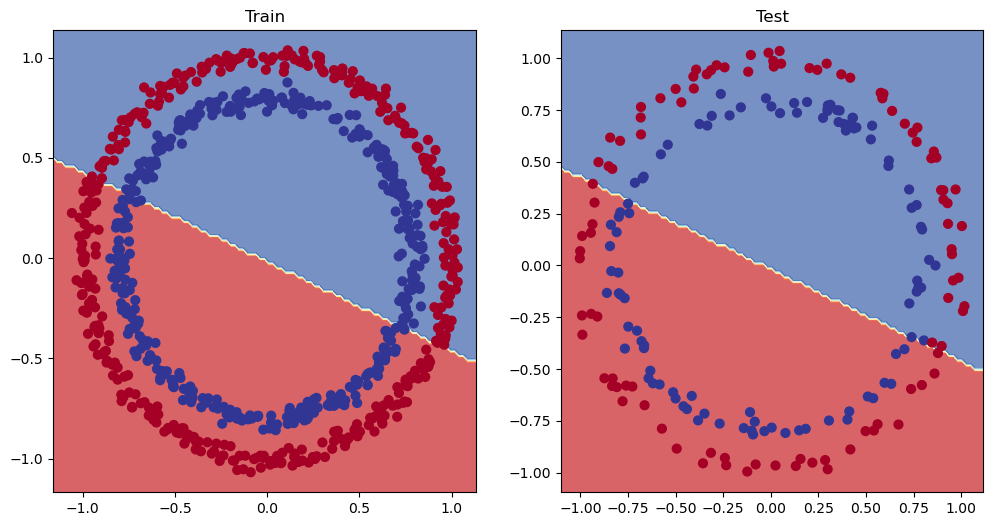

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model

* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [31]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [33]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = tr.optim.SGD(params=model_1.parameters(),
                         lr=0.1)

In [34]:
# Writing a training and evaluation loop for model_1
tr.manual_seed(42)

# Train for longer 
epochs = 1000

for epoch in range(epochs):
    # Training
    model_1.train()
    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = tr.round(tr.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc - accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with tr.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = tr.round(tr.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc - accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.69396, Accuracy: 51.12% | Test Loss: 0.69261, Test Accuracy: 46.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 51.12% | Test Loss: 0.69379, Test Accuracy: 46.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69458, Test Accuracy: 46.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69467, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%


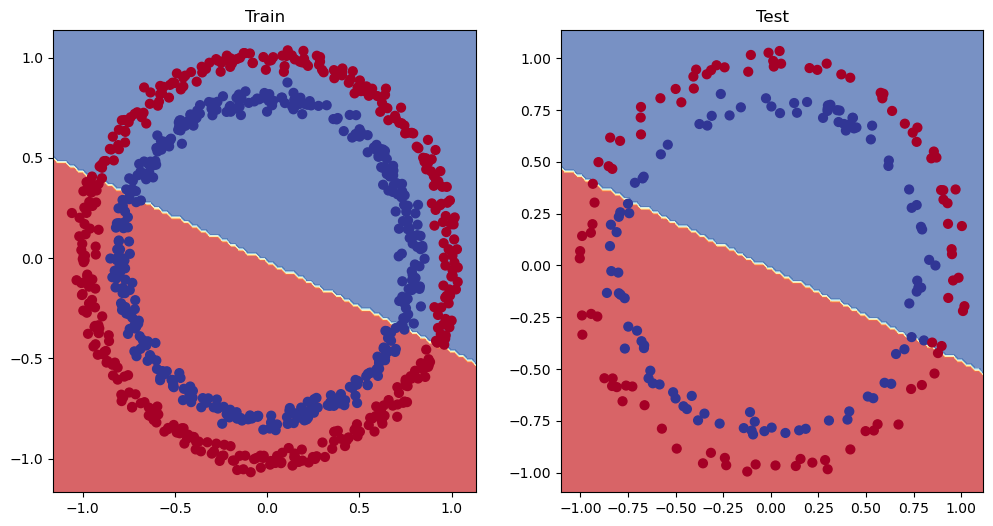

In [35]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

## Preparing dat to see fi our model can fit a straight line

In [36]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create a data
X_regression = tr.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regressoin formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the laneghts of each 
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

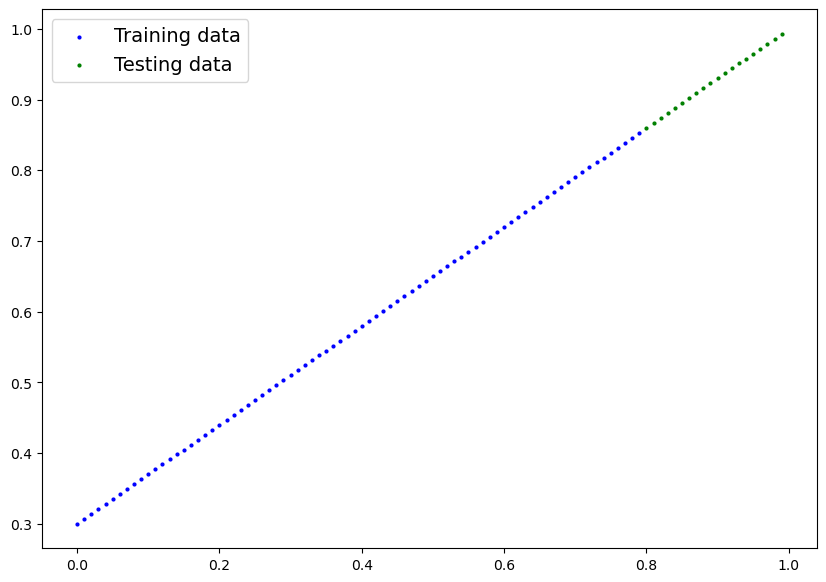

In [38]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

## Adjust model_1 to fit straight line

In [39]:
# Same architecture as model_1 but using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1))

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Loss and optimizer 
loss_fn = nn.L1Loss()
optimizer = tr.optim.SGD(params=model_2.parameters(),
                         lr=0.01)

In [41]:
tr.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with tr.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.75986, Accuracy: 51.12% | Test Loss: 0.91103, Test Accuracy: 46.00%
Epoch: 100 | Loss: 0.02858, Accuracy: 51.12% | Test Loss: 0.00081, Test Accuracy: 46.00%
Epoch: 200 | Loss: 0.02533, Accuracy: 51.12% | Test Loss: 0.00209, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.02137, Accuracy: 51.12% | Test Loss: 0.00305, Test Accuracy: 46.00%
Epoch: 400 | Loss: 0.01964, Accuracy: 51.12% | Test Loss: 0.00341, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.01940, Accuracy: 51.12% | Test Loss: 0.00387, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.01903, Accuracy: 51.12% | Test Loss: 0.00379, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.01878, Accuracy: 51.12% | Test Loss: 0.00381, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.01840, Accuracy: 51.12% | Test Loss: 0.00329, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.01798, Accuracy: 51.12% | Test Loss: 0.00360, Test Accuracy: 46.00%


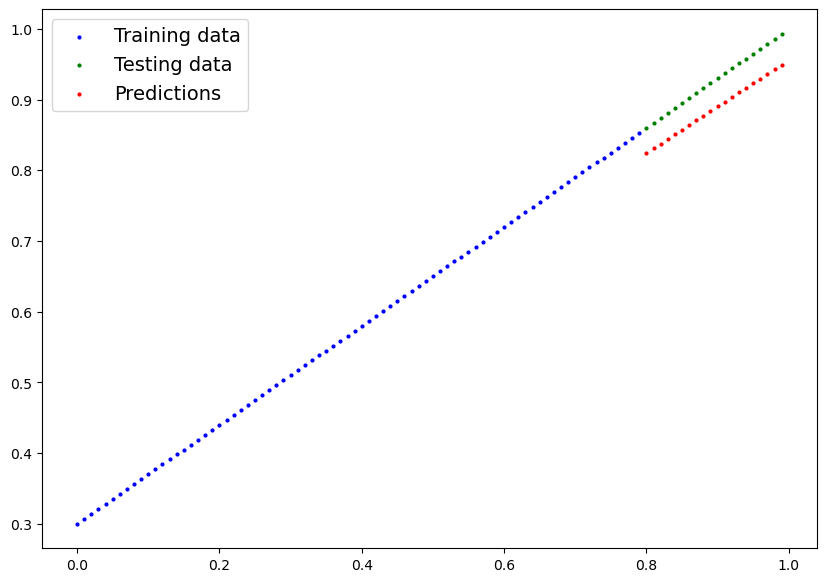

In [42]:
# Turn on evaluaiton mode
model_2.eval()

with tr.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

 ## NON-LINEARITY

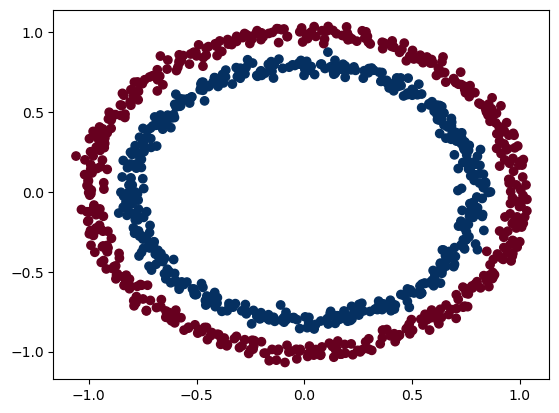

In [43]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [44]:
# Convert data to tensors and then to train and test splits
X = tr.from_numpy(X).type(tr.float)
y = tr.from_numpy(y).type(tr.float)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [45]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Build a model with non linear activation function 

In [46]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
## Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = tr.optim.SGD(model_3.parameters(),
                         lr=0.1)

## Training a model with non-linearity

In [52]:
len(X_test), len(y_test)

(200, 200)

In [53]:
tr.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred = tr.round(tr.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with tr.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = tr.round(tr.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.56746, Accuracy: 88.00% | Test Loss: 0.57316, Test Accuracy: 86.50%
Epoch: 100 | Loss: 0.48052, Accuracy: 93.50% | Test Loss: 0.49852, Test Accuracy: 90.50%
Epoch: 200 | Loss: 0.36939, Accuracy: 97.88% | Test Loss: 0.40494, Test Accuracy: 92.50%
Epoch: 300 | Loss: 0.25355, Accuracy: 99.00% | Test Loss: 0.30227, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.17116, Accuracy: 99.50% | Test Loss: 0.22043, Test Accuracy: 97.50%
Epoch: 500 | Loss: 0.12149, Accuracy: 99.75% | Test Loss: 0.16466, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.09098, Accuracy: 99.88% | Test Loss: 0.12711, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07084, Accuracy: 99.88% | Test Loss: 0.10302, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05762, Accuracy: 99.88% | Test Loss: 0.08658, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04845, Accuracy: 99.88% | Test Loss: 0.07464, Test Accuracy: 99.50%


In [50]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.927

In [54]:
model_3.eval()
with tr.inference_mode():
    y_preds = tr.round(tr.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

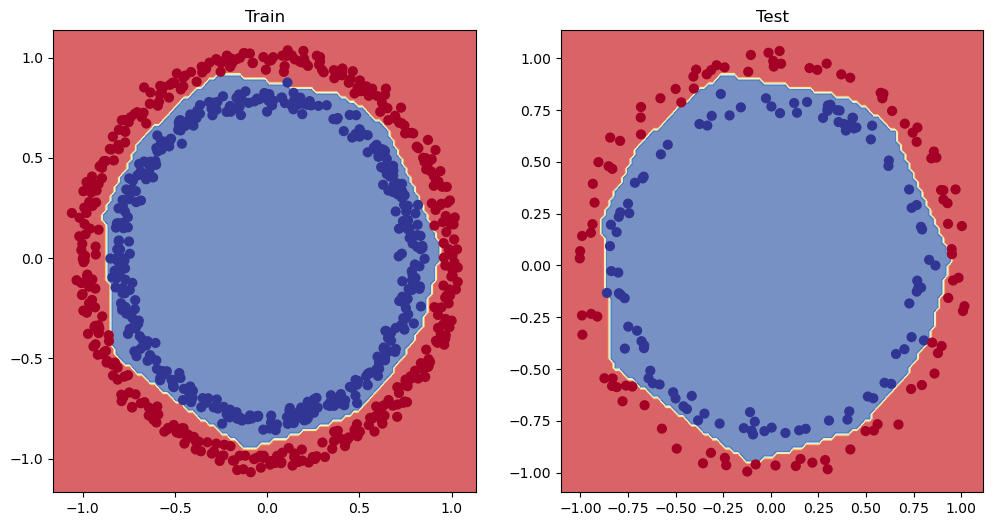

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

## Replacing Non-Linear activation functions

In [57]:
# Create a tensor 
A = tr.arange(-10,10,1, dtype=tr.float32)
A.dtype

torch.float32

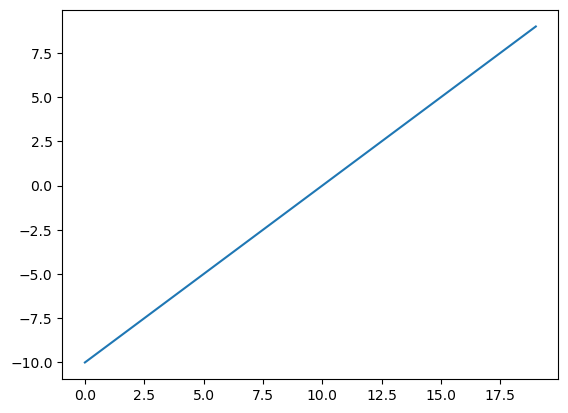

In [58]:
plt.plot(A)

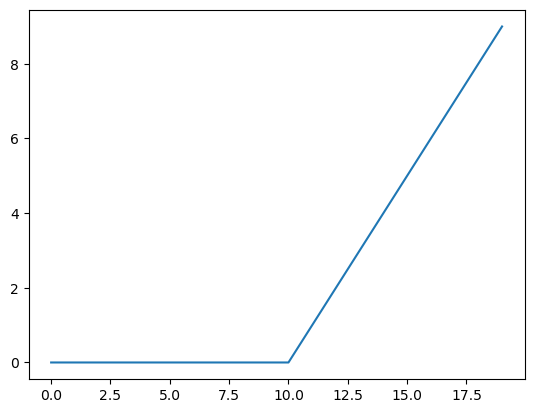

In [59]:
plt.plot(tr.relu(A));

In [61]:
def relu(x):
    return tr.maximum(tr.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

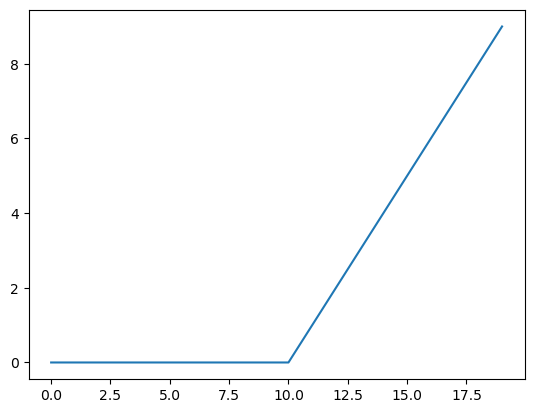

In [62]:
plt.plot(relu(A))

In [68]:
def sigmoid(x):
    return 1 / (1 + tr.exp(-x))

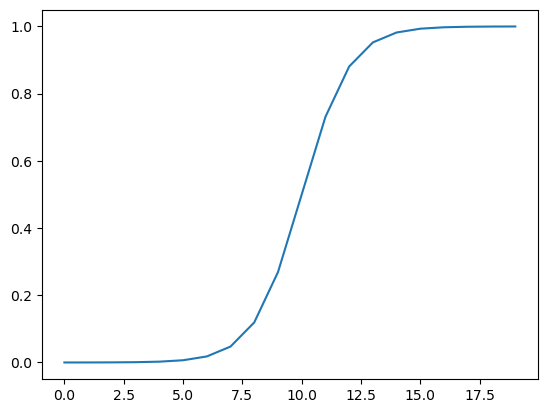

In [66]:
plt.plot(tr.sigmoid(A));

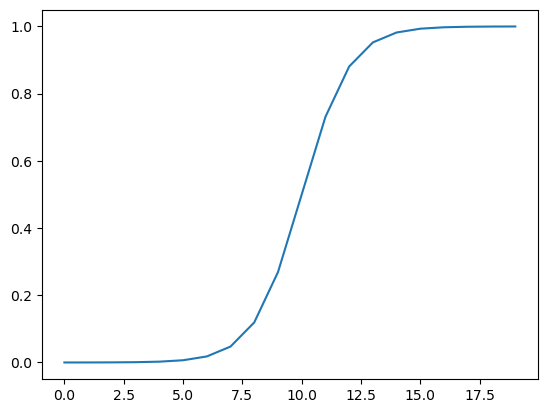

In [69]:
plt.plot(sigmoid(A))

In [70]:
from sklearn.datasets import make_blobs

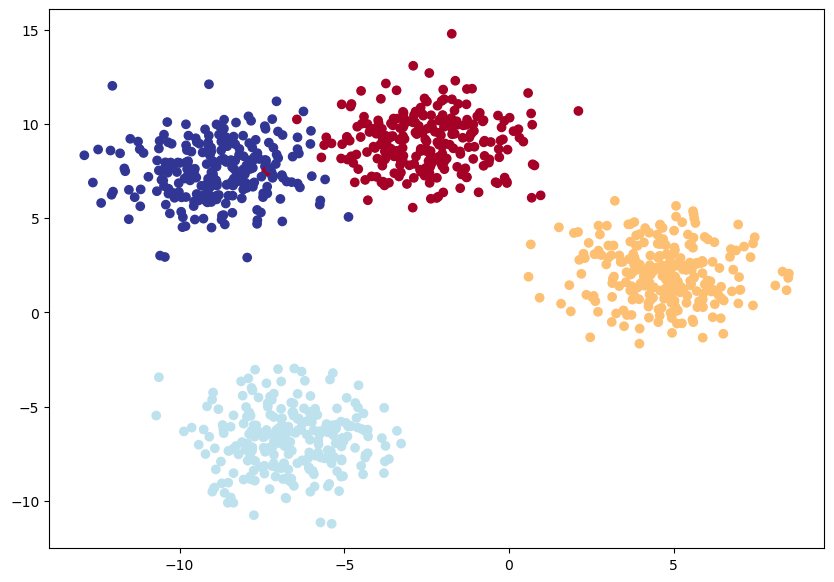

In [93]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
# Turn data into tensors
X_blob = tr.from_numpy(X_blob).type(tr.float)
y_blob = tr.from_numpy(y_blob).type(tr.LongTensor)

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

# Creating multi-class classificaiton model

In [79]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        '''
        Initializes multi-class classification model

        Args:
            input_features (int): Number of input features to the model
            output _features (int): Number of output features (number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        '''
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features))

    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)

## Create a loss functoin and optimizer

In [80]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = tr.optim.SGD(params=model_4.parameters(),
                         lr=0.1)

# getting prediction probabilities for a multi-class PyTorch model

In [85]:
model_4.eval()
with tr.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [82]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [87]:
# Convert our model's logit outputs to predictions probabilites
y_pred_probs = tr.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [88]:
tr.sum(y_pred_probs[0])

tensor(1.)

In [89]:
tr.argmax(y_pred_probs[0])

tensor(3)

In [90]:
# Convert our model's predictions probabilities to predction labels
y_preds = tr.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [91]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

## Creating a training loop and testing loop for multi-class PyTorch model

In [96]:
# fit multi-class model to the data
tr.manual_seed(42)

# Set number of epochs
epochs = 100

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = tr.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with tr.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = tr.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.57519, Accuracy: 95.38% | Test Loss: 0.42672, Test Accuracy: 97.50%
Epoch: 10 | Loss: 0.13289, Accuracy: 99.12% | Test Loss: 0.12048, Test Accuracy: 99.00%
Epoch: 20 | Loss: 0.07753, Accuracy: 99.12% | Test Loss: 0.06920, Test Accuracy: 99.50%
Epoch: 30 | Loss: 0.05788, Accuracy: 99.12% | Test Loss: 0.04999, Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.04818, Accuracy: 99.00% | Test Loss: 0.04023, Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.04249, Accuracy: 99.00% | Test Loss: 0.03438, Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.03879, Accuracy: 99.00% | Test Loss: 0.03051, Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.03621, Accuracy: 99.00% | Test Loss: 0.02775, Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.03431, Accuracy: 99.12% | Test Loss: 0.02569, Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.03287, Accuracy: 99.12% | Test Loss: 0.02409, Test Accuracy: 99.50%


## Making and evaluating predictions with Pytorch multi-class model

In [97]:
model_4.eval()
with tr.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3551,  10.3920, -14.9378,  -9.7940],
        [  5.0249, -12.0799,   3.3984,  10.6999],
        [ -5.6140, -13.3927,  21.0484,  12.8085],
        [  1.8479,   7.5879,  -8.6272,  -7.0156],
        [  8.0997,   3.3034, -14.6397,  -3.6309],
        [  5.5958, -15.0054,   5.0344,  13.3266],
        [ -5.9993, -10.2278,  18.9179,   9.9470],
        [  7.0976,  -0.7620,  -9.5784,   0.1726],
        [ -5.6194, -18.6659,  25.6036,  17.6314],
        [  7.3378,   0.7232, -11.2318,  -1.2062]])

In [99]:
y_pred_probs = tr.softmax(y_logits, dim=1)
y_pred_probs

tensor([[2.3832e-03, 9.9762e-01, 9.9620e-12, 1.7071e-09],
        [3.4166e-03, 1.2738e-10, 6.7180e-04, 9.9591e-01],
        [2.6337e-12, 1.1023e-15, 9.9974e-01, 2.6383e-04],
        [3.2043e-03, 9.9680e-01, 9.0462e-08, 4.5329e-07],
        [9.9180e-01, 8.1919e-03, 1.3207e-10, 7.9778e-06],
        [4.3880e-04, 4.9575e-13, 2.5030e-04, 9.9931e-01],
        [1.5085e-11, 2.1987e-13, 9.9987e-01, 1.2704e-04],
        [9.9863e-01, 3.8549e-04, 5.7164e-08, 9.8152e-04],
        [2.7534e-14, 5.9408e-20, 9.9966e-01, 3.4479e-04],
        [9.9847e-01, 1.3386e-03, 8.6032e-09, 1.9443e-04],
        [9.8697e-01, 8.5634e-05, 1.6606e-06, 1.2947e-02],
        [4.6870e-04, 9.9953e-01, 1.9020e-13, 4.3976e-11],
        [9.9729e-01, 2.6914e-03, 3.8248e-10, 2.3566e-05],
        [9.9957e-01, 2.7477e-04, 1.9797e-09, 1.5744e-04],
        [9.9965e-01, 3.1412e-04, 2.0123e-10, 3.9072e-05],
        [3.2364e-02, 1.0346e-08, 5.8503e-04, 9.6705e-01],
        [1.8975e-03, 3.9503e-11, 6.7939e-04, 9.9742e-01],
        [1.094

In [100]:
# go from pred probs to pred labels
y_preds = tr.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

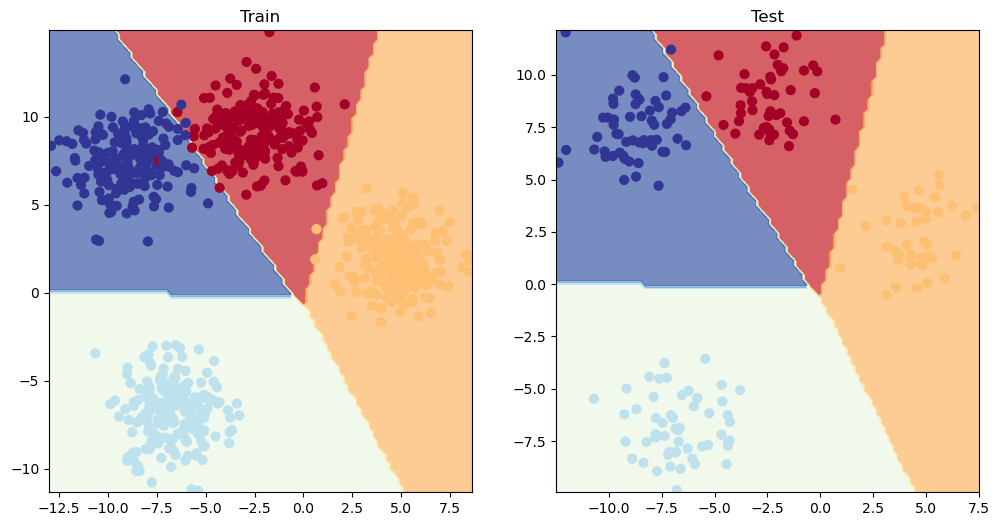

In [102]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [115]:
from torchmetrics import Accuracy 

torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES)

accuracy = torchmetric_accuracy(y_preds, y_blob_test)

print(f'Accuracy: {(accuracy * 100):.2f}%')

Accuracy: 99.50%
